# **1. Análisis exploratorio (EDA)**

In [1]:
#Importación de librerías para manipulación de datos y visualización
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Carga de datos de titulares de noticias publicados entre 2012-2022 y su categoría
#El archivo esta en formato JSON con registros por línea (semiestructurado)
data = pd.read_json("/content/data (3).json", lines = True)

In [3]:
#Se valida que los campos Category y headline son diccionarios
type(data.loc[0, "category"])
type(data.loc[0, "headline"])

dict

In [4]:
#Reconstrucción del Dataframe en formato tabular
#Se transforman los diccionarios en columnas con una fila por noticia
news= pd.DataFrame.from_dict({
    "headline": data.loc[0, "headline"],
    "category": data.loc[0, "category"]
}, orient="index").T

In [5]:
#Validar la correcta transformación de los datos
news.head()

,headline,category
0,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS
1,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS
2,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY
3,The Funniest Tweets From Parents This Week (Se...,PARENTING
4,Woman Who Called Cops On Black Bird-Watcher Lo...,U.S. NEWS


In [6]:
#Conocer el tamaño del dataset (filas, columnas)
news.shape

(209527, 2)

In [7]:
#Número total de categorías únicas
news["category"].nunique()

42

In [8]:
#Revisión de valores nulos en las dos columnas
news.isnull().sum()

,0
headline,0
category,0


# Análisis del balance de clases

In [9]:
#Exploración de la frecuencia de las categorias más comunes
news["category"].value_counts().head()

,count
category,
POLITICS,35602
WELLNESS,17945
ENTERTAINMENT,17362
TRAVEL,9900
STYLE & BEAUTY,9814


In [10]:
#Top 10 categorías más frecuentes
top10_category = (
    news["category"]
    .value_counts()
    .iloc[:10]
    .to_frame(name="Número de noticias")
)
top10_category

,Número de noticias
category,
POLITICS,35602
WELLNESS,17945
ENTERTAINMENT,17362
TRAVEL,9900
STYLE & BEAUTY,9814
PARENTING,8791
HEALTHY LIVING,6694
QUEER VOICES,6347
FOOD & DRINK,6340


In [11]:
#Top 10 categorías menos frecuentes
less10_category = (
    news["category"]
    .value_counts(ascending=True)
    .head(10)
    .to_frame(name="Número de noticias")
)
less10_category

,Número de noticias
category,
EDUCATION,1014
CULTURE & ARTS,1074
LATINO VOICES,1130
COLLEGE,1144
ARTS & CULTURE,1339
U.S. NEWS,1377
GOOD NEWS,1398
FIFTY,1401
ENVIRONMENT,1444


# **2. Preparación y entrenamiento**

In [12]:
#Importación de librerías para entrenamiento, modelado y evaluación del clasificador de texto
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

In [13]:
#Variable independiente título
#Variable objetivo categoría
x = news["headline"]
y = news["category"]

In [14]:
#Dividir los datos para entrenamiento y evaluación
x_train, x_test, y_train, y_test = train_test_split(
    x,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [15]:
#Conversión del texto a características númerica usando TF-IDF
tfidf = TfidfVectorizer(
    lowercase=True,
    stop_words="english",
    max_df=0.9,
    min_df=5,
    ngram_range=(1, 2)
)
x_train_tfidf = tfidf.fit_transform(x_train)
x_test_tfidf = tfidf.transform(x_test)

# Modelo 1: Regresión logística
(Modelo de clasificación lineal)

In [16]:
#Entrenamiento del modelo Regresión Logística
lr_model = LogisticRegression(
    max_iter=1000,
    n_jobs=-1
)
lr_model.fit(x_train_tfidf, y_train)

LogisticRegression(max_iter=1000, n_jobs=-1)

In [17]:
#Evaluación del modelo Regresión Logística
y_pred_lr = lr_model.predict(x_test_tfidf)
print("Logistic Regression Accuracy:")
print(accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

Logistic Regression Accuracy:
0.5806328449386723
                precision    recall  f1-score   support

          ARTS       0.41      0.16      0.23       302
ARTS & CULTURE       0.41      0.11      0.18       268
  BLACK VOICES       0.55      0.37      0.44       917
      BUSINESS       0.51      0.44      0.47      1198
       COLLEGE       0.52      0.32      0.40       229
        COMEDY       0.64      0.42      0.50      1080
         CRIME       0.54      0.53      0.53       712
CULTURE & ARTS       0.77      0.22      0.35       215
       DIVORCE       0.82      0.61      0.70       685
     EDUCATION       0.50      0.26      0.34       203
 ENTERTAINMENT       0.57      0.77      0.65      3473
   ENVIRONMENT       0.66      0.20      0.31       289
         FIFTY       0.57      0.14      0.22       280
  FOOD & DRINK       0.62      0.68      0.65      1268
     GOOD NEWS       0.48      0.12      0.19       280
         GREEN       0.45      0.29      0.36       52

# Modelo 2: Naive Bayes
(Modelo probabilístico)

In [18]:
#Entrenamiento del modelo Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(x_train_tfidf, y_train)

MultinomialNB()

In [19]:
#Evaluación del modelo Naive Bayes
y_pred_nb = nb_model.predict(x_test_tfidf)

print("Naive Bayes Accuracy:")
print(accuracy_score(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))

Naive Bayes Accuracy:
0.4752780031499069


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


                precision    recall  f1-score   support

          ARTS       0.50      0.00      0.01       302
ARTS & CULTURE       0.00      0.00      0.00       268
  BLACK VOICES       0.70      0.11      0.20       917
      BUSINESS       0.60      0.16      0.26      1198
       COLLEGE       0.00      0.00      0.00       229
        COMEDY       0.78      0.18      0.29      1080
         CRIME       0.64      0.28      0.39       712
CULTURE & ARTS       1.00      0.05      0.09       215
       DIVORCE       0.93      0.30      0.45       685
     EDUCATION       1.00      0.01      0.02       203
 ENTERTAINMENT       0.45      0.80      0.58      3473
   ENVIRONMENT       1.00      0.10      0.18       289
         FIFTY       0.00      0.00      0.00       280
  FOOD & DRINK       0.66      0.60      0.63      1268
     GOOD NEWS       0.67      0.01      0.01       280
         GREEN       0.37      0.02      0.05       524
HEALTHY LIVING       0.58      0.02      0.03  

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# **3. Evaluación**

In [20]:
#Importación de funciones estándar para evaluar los modelos de clasificación
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    ConfusionMatrixDisplay
)

**Evaluación 1: Regresión logística**

In [21]:
#Clasificar titulares nunca vistos.
y_pred_lr = lr_model.predict(x_test_tfidf)

#Accuracy
accuracy_lr = accuracy_score(y_test, y_pred_lr)
accuracy_lr

0.5806328449386723

In [22]:
#Promedio macro para que todas las categoría pesen igual
precision_lr = precision_score(y_test, y_pred_lr, average="macro")
recall_lr = recall_score(y_test, y_pred_lr, average="macro")
f1_lr = f1_score(y_test, y_pred_lr, average="macro")

precision_lr, recall_lr, f1_lr


(0.5624740856721596, 0.39243866626318225, 0.43457939178914884)

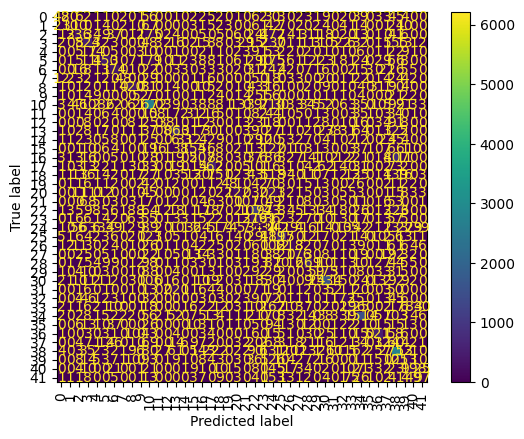

In [23]:
#Matriz de confusión
mx_lr = confusion_matrix(y_test, y_pred_lr)
disp = ConfusionMatrixDisplay(mx_lr)
disp.plot(xticks_rotation=90)


**Evaluacion 2: Naive Bayes**

In [24]:
#Clasificar titulares nunca vistos.
y_pred_nb = nb_model.predict(x_test_tfidf)

#Accuracy
accuracy_nb = accuracy_score(y_test, y_pred_nb)
accuracy_nb

0.4752780031499069

In [25]:
#zero_division=0 (para evitar errores cuando el modelo no predice ciertas clases)
precision_nb = precision_score(y_test, y_pred_nb, average="macro", zero_division=0)
recall_nb = recall_score(y_test, y_pred_nb, average="macro")
f1_nb = f1_score(y_test, y_pred_nb, average="macro")

precision_nb, recall_nb, f1_nb


(0.6063288889275266, 0.20683355004912682, 0.22782269845879627)

#MODELO FINAL ELEGIDO: *LOGISTIC REGRESSION*


# **4. API de inferencia**

In [26]:
#Guardar el modelo entrenado y el vectorizador TF-IDF
import joblib

joblib.dump(lr_model, "news_model.pkl")
joblib.dump(tfidf, "tfidf_vectorizer.pkl")


['tfidf_vectorizer.pkl']